In [17]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import fetch_olivetti_faces
from sklearn.metrics import f1_score

In [2]:
# load the data 
data = fetch_olivetti_faces()
data.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [3]:
# declare inputs, target and images
inputs=data.data
target=data.target
images=data.images

In [4]:
inputs.shape# check the shape of our data 

(400, 4096)

In [67]:
images[0].shape

(64, 64)

In [5]:
pd.DataFrame(inputs).head()  # take a look at first rows

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.665289,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554


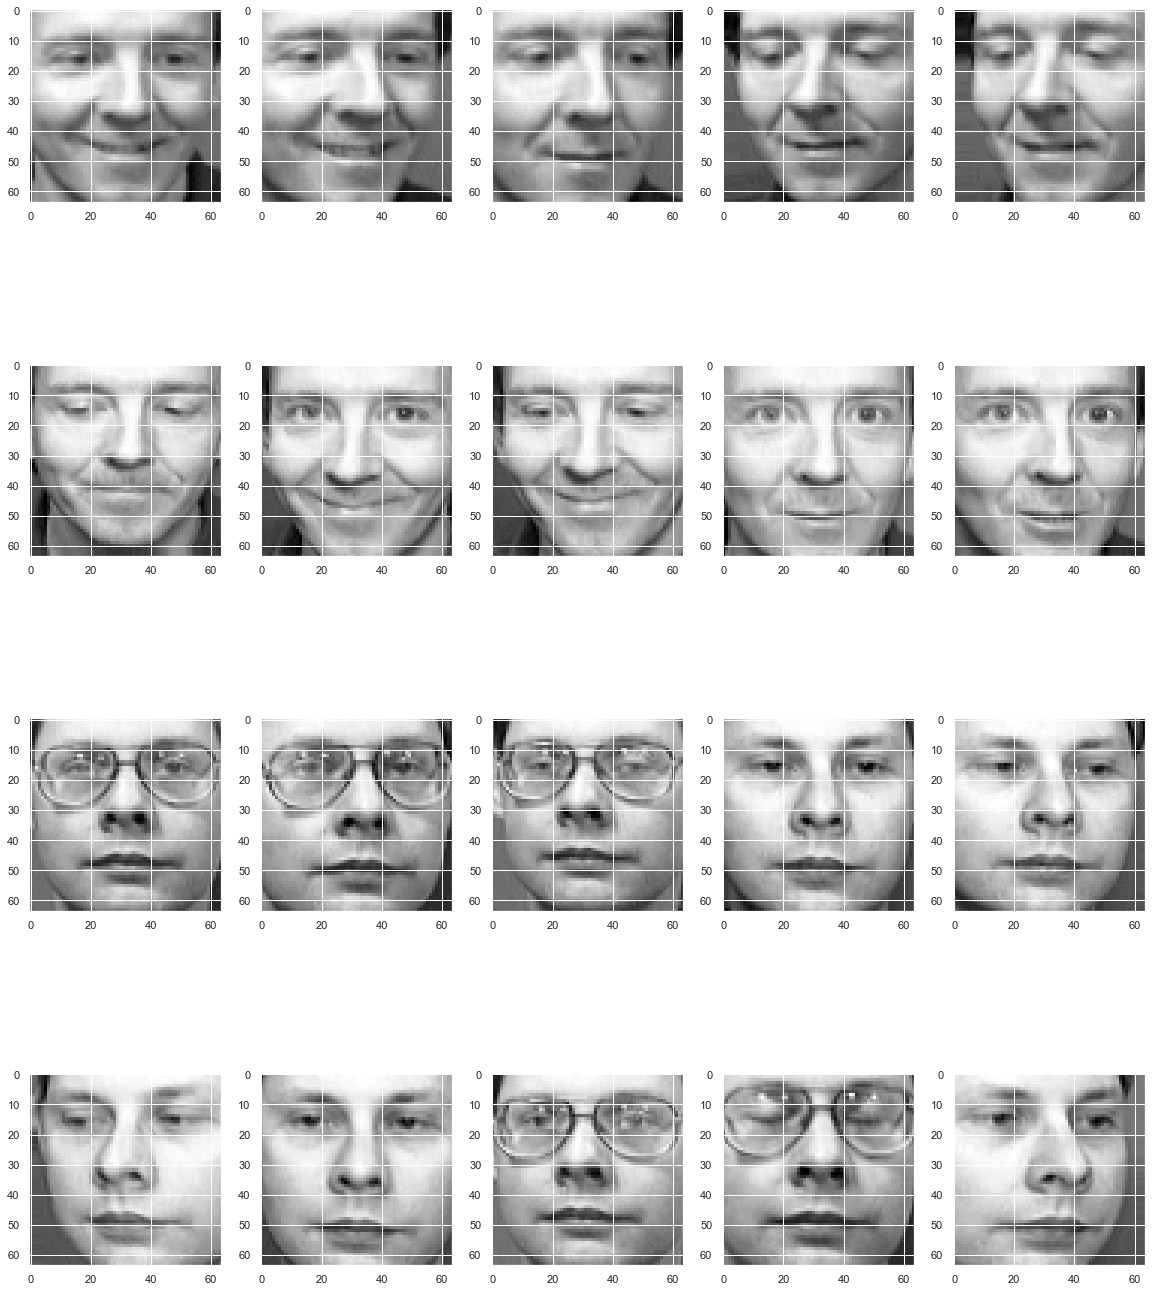

In [7]:
# take a look at our face images
plt.figure(figsize=(20,25))
for i in range(20,40):
    plt.subplot(4,5,i-19)
    plt.imshow(data.images[i], cmap=plt.cm.gray)
plt.show()

In [8]:
# there are total 400 images and each person has ten pictures .
# there are 400/10=40 people in our dataset 

In [28]:
# import library
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# train test split
x_train, x_test, y_train, y_test = train_test_split(inputs, target, random_state=365)

In [88]:
x_train.shape,x_test.shape # take a look at their shape 

((300, 4096), (100, 4096))

In [33]:
# create a function to plot line graph to compare ratio - Explained Variance changes with different n component
def EV(n):
    pca = PCA(n_components=n, whiten=True)
    X_train = pca.fit_transform(x_train)
    X_test = pca.transform(x_test)
    #plot
    plt.plot(range(1,n+1), pca.explained_variance_ratio_.cumsum())
    plt.title('Explained Variance',fontsize=15)
    plt.xlabel('Number of Principle Components : {}'.format(n), fontsize=10)


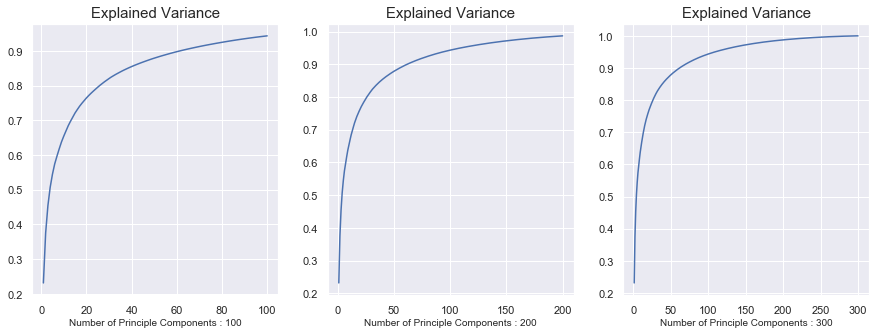

In [35]:
# use the function above and try use n_component=100,200,and 300
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
EV(100)
plt.subplot(1,3,2)
EV(200)
plt.subplot(1,3,3)
EV(300)

In [36]:
# PCA transformation and reduce the dimension from 4096 to 200
n=200
pca = PCA(n_components=n, whiten=True)
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)

In [37]:
# import packages
from sklearn.model_selection import GridSearchCV
from sklearn import svm
# gridsearch for our model 
clf = svm.SVC()

param_grid = {'C' : np.linspace(0.1, 10, num=11),
             'gamma' : np.linspace(10**-3, 5, num=11)}

grid_search = GridSearchCV(clf, param_grid, cv=5)

%timeit grid_search.fit(X_train, y_train)
# obtian the best parameters 
grid_search.best_params_,grid_search.best_estimator_.score(X_test, y_test)

30.7 s ± 1.36 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


({'C': 4.06, 'gamma': 0.001}, 0.96)

In [38]:
# apply best prams above
clf = svm.SVC(C=4.06, gamma=0.001)
%timeit clf.fit(X_train, y_train)

65.2 ms ± 2.55 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [39]:
# obtian the accuracy
accuracy_train= clf.score(X_train, y_train)
accuracy_test= clf.score(X_test, y_test)
print('Accuracy - train data: {}'.format(accuracy_train))
print('Accuracy - test data : {}'.format( accuracy_test))

# prediction
test_pre=clf.predict(X_test)
train_pre=clf.predict(X_train)

# F1 _score
f1_train=f1_score(y_train,train_pre,average='weighted')
f1_test=f1_score(y_test,test_pre,average='weighted')
print("f1 score - test data  : {}" .format(f1_test))

Accuracy - train data: 1.0
Accuracy - test data : 0.96
f1 score - test data  : 0.9612142857142857


In [200]:
# a funtion which is a mini-project to recognize face image#

def Actual_VS_Prediction():
    n=int(input("Please chose a face image#: "))# first you can choose any image that you want "scan"
    test_compressed = pca.transform(x_test)
    plt.subplot(1,2,1)
    plt.imshow(pca.inverse_transform(test_compressed[y_test[int(n)]]).reshape(64,64), cmap=plt.cm.gray)
    plt.title("Actual Image")
    # prediction
    plt.subplot(1,2,2)
    plt.imshow(pca.inverse_transform(test_compressed[test_pre[int( n)]]).reshape(64,64), cmap=plt.cm.gray)
    plt.title("Predicted Image")

    if test_pre[n] == y_test[n]:
        print(" Yay! The image matches! ")
    else: 
        print(" Sorry! The image does not match!")
    plt.show()

Please chose a face image#: 30
 Yay! The image matches! 


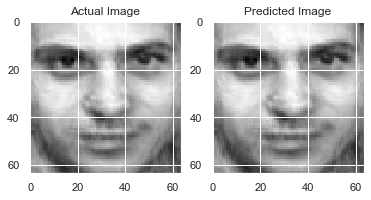

In [201]:
# now let us try our mini-project!
Actual_VS_Prediction()

# Deep Learning Algorithom

In [298]:
# import packages
from tensorflow.python import keras
from keras.layers import Dense,Dropout,Activation
from sklearn.metrics import  accuracy_score, f1_score, roc_auc_score
from keras.models import Sequential
from keras import regularizers

In [332]:
# neural network

model= Sequential()
model.add(Dense(200, activation='tanh',kernel_regularizer=regularizers.l2(0.005),input_shape=(200,)))  
model.add(Dense(40, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=300, batch_size=80 ,validation_data=(X_test, y_test))



Train on 300 samples, validate on 100 samples
Epoch 1/300
300/300 [==============================] - 0s 638us/step - loss: 5.0287 - accuracy: 0.0100 - val_loss: 4.7992 - val_accuracy: 0.0200
Epoch 2/300
300/300 [==============================] - 0s 79us/step - loss: 4.9859 - accuracy: 0.0167 - val_loss: 4.7681 - val_accuracy: 0.0200
Epoch 3/300
300/300 [==============================] - 0s 67us/step - loss: 4.9435 - accuracy: 0.0200 - val_loss: 4.7370 - val_accuracy: 0.0300
Epoch 4/300
300/300 [==============================] - 0s 57us/step - loss: 4.9008 - accuracy: 0.0267 - val_loss: 4.7064 - val_accuracy: 0.0300
Epoch 5/300
300/300 [==============================] - 0s 74us/step - loss: 4.8587 - accuracy: 0.0267 - val_loss: 4.6758 - val_accuracy: 0.0300
Epoch 6/300
300/300 [==============================] - 0s 118us/step - loss: 4.8168 - accuracy: 0.0333 - val_loss: 4.6452 - val_accuracy: 0.0500
Epoch 7/300
300/300 [==============================] - 0s 102us/step - loss: 4.7748 - ac

Epoch 113/300
300/300 [==============================] - 0s 98us/step - loss: 1.7379 - accuracy: 0.9967 - val_loss: 2.3629 - val_accuracy: 0.8700
Epoch 114/300
300/300 [==============================] - 0s 76us/step - loss: 1.7250 - accuracy: 0.9967 - val_loss: 2.3520 - val_accuracy: 0.8700
Epoch 115/300
300/300 [==============================] - 0s 91us/step - loss: 1.7122 - accuracy: 0.9967 - val_loss: 2.3411 - val_accuracy: 0.8700
Epoch 116/300
300/300 [==============================] - 0s 145us/step - loss: 1.6998 - accuracy: 0.9967 - val_loss: 2.3305 - val_accuracy: 0.8700
Epoch 117/300
300/300 [==============================] - 0s 128us/step - loss: 1.6875 - accuracy: 0.9967 - val_loss: 2.3200 - val_accuracy: 0.8700
Epoch 118/300
300/300 [==============================] - 0s 80us/step - loss: 1.6754 - accuracy: 0.9967 - val_loss: 2.3095 - val_accuracy: 0.8700
Epoch 119/300
300/300 [==============================] - 0s 92us/step - loss: 1.6636 - accuracy: 0.9967 - val_loss: 2.2993

Epoch 169/300
300/300 [==============================] - 0s 105us/step - loss: 1.2824 - accuracy: 1.0000 - val_loss: 1.9342 - val_accuracy: 0.9000
Epoch 170/300
300/300 [==============================] - 0s 120us/step - loss: 1.2777 - accuracy: 1.0000 - val_loss: 1.9290 - val_accuracy: 0.9000
Epoch 171/300
300/300 [==============================] - 0s 75us/step - loss: 1.2731 - accuracy: 1.0000 - val_loss: 1.9239 - val_accuracy: 0.9000
Epoch 172/300
300/300 [==============================] - 0s 75us/step - loss: 1.2685 - accuracy: 1.0000 - val_loss: 1.9189 - val_accuracy: 0.9000
Epoch 173/300
300/300 [==============================] - 0s 101us/step - loss: 1.2641 - accuracy: 1.0000 - val_loss: 1.9140 - val_accuracy: 0.9000
Epoch 174/300
300/300 [==============================] - 0s 144us/step - loss: 1.2597 - accuracy: 1.0000 - val_loss: 1.9090 - val_accuracy: 0.9000
Epoch 175/300
300/300 [==============================] - 0s 72us/step - loss: 1.2553 - accuracy: 1.0000 - val_loss: 1.90

300/300 [==============================] - 0s 75us/step - loss: 1.0076 - accuracy: 1.0000 - val_loss: 1.5792 - val_accuracy: 0.9400
Epoch 281/300
300/300 [==============================] - 0s 97us/step - loss: 1.0062 - accuracy: 1.0000 - val_loss: 1.5771 - val_accuracy: 0.9400
Epoch 282/300
300/300 [==============================] - 0s 87us/step - loss: 1.0049 - accuracy: 1.0000 - val_loss: 1.5751 - val_accuracy: 0.9400
Epoch 283/300
300/300 [==============================] - 0s 90us/step - loss: 1.0035 - accuracy: 1.0000 - val_loss: 1.5731 - val_accuracy: 0.9400
Epoch 284/300
300/300 [==============================] - 0s 90us/step - loss: 1.0022 - accuracy: 1.0000 - val_loss: 1.5710 - val_accuracy: 0.9400
Epoch 285/300
300/300 [==============================] - 0s 140us/step - loss: 1.0008 - accuracy: 1.0000 - val_loss: 1.5690 - val_accuracy: 0.9400
Epoch 286/300
300/300 [==============================] - 0s 85us/step - loss: 0.9995 - accuracy: 1.0000 - val_loss: 1.5670 - val_accuracy

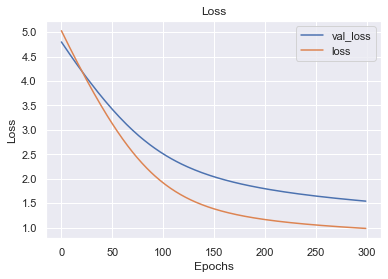

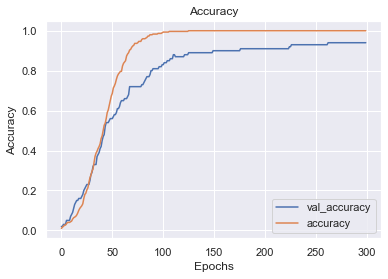

In [333]:
# def visualize_training_results(results):
history = history.history
plt.figure()
plt.plot(history['val_loss'])
plt.plot(history['loss'])
plt.legend(['val_loss', 'loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(history['val_accuracy'])
plt.plot(history['accuracy'])
plt.legend(['val_accuracy', 'accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [334]:
loss1, accuracy1 = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy1))
loss2, accuracy2 = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy2))

Training Accuracy: 1.0000
Testing Accuracy:  0.9400


The accuracy is also up to 94% which is slightly lower than the accuracy is from SVM 

# More EDA 

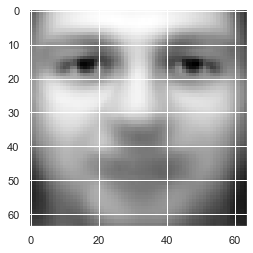

In [231]:
plt.imshow(inputs.mean(axis=0).reshape(data.images[100].shape), cmap=plt.cm.gray)

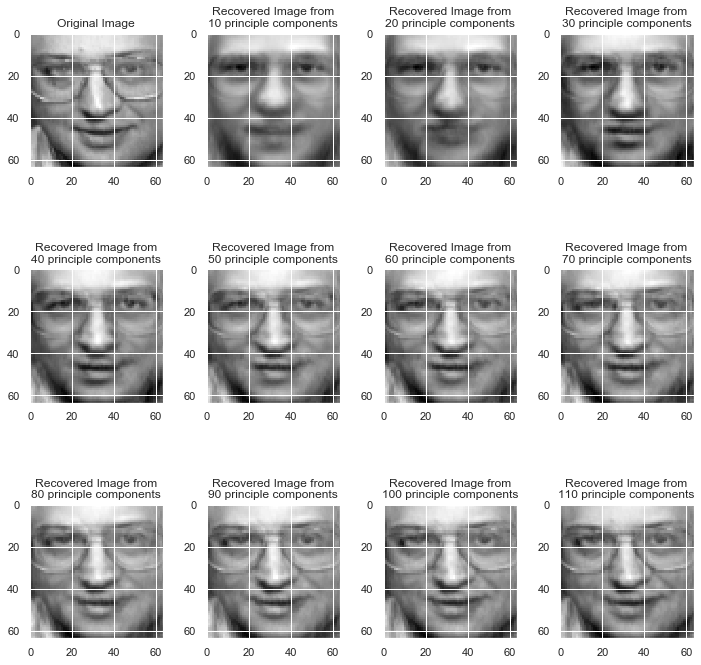

In [86]:
# let us take a look at a face image changes with different n-component!
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(10,10))
ax = axes[0][0]
ax.set_title('Original Image')
ax.imshow(X_train[0].reshape(64,64), cmap=plt.cm.gray)
for n in range(1,12):
    i = n //4
    j = n%4
    ax = axes[i][j]
    ax.set_title('Re')
    n_feats = n*10
    pca = PCA(n_components=n_feats)
    pca.fit(X_train)
    compressed = pca.transform(X_train)
    ax.set_title('Recovered Image from\n{} principle components'.format(n_feats))
    ax.imshow(pca.inverse_transform(compressed[0]).reshape(64,64), cmap=plt.cm.gray)
plt.tight_layout()

# How to use your own face image data to do this project.

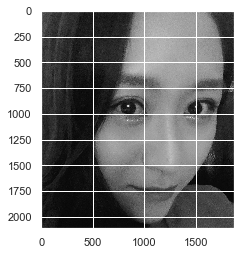

In [191]:
# Now let's see the if gray color is better , because there are different color of CT images (red or black/white)
import cv2
import os

path='/Users/huashi/Desktop/projects/PCA_for_Facial_Image_Recognition/Facical_image'
for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array,cmap="gray")
    plt.show()
    break

In [192]:
# create a function to load the image data 
def create_data(path):
    list_new_array=[]
    for img in os.listdir(path):
        try:
            img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            size=100
            new_array=cv2.resize(img_array,(size,size))
            list_new_array.append(new_array)
        except Exception as e:
            pass
    return list_new_array    

In [193]:
# reshape the data 
hua=np.array(create_data(path))
hua_reshape=hua.reshape(8, 100*100).astype('float32')
hua_reshape.shape

(8, 10000)

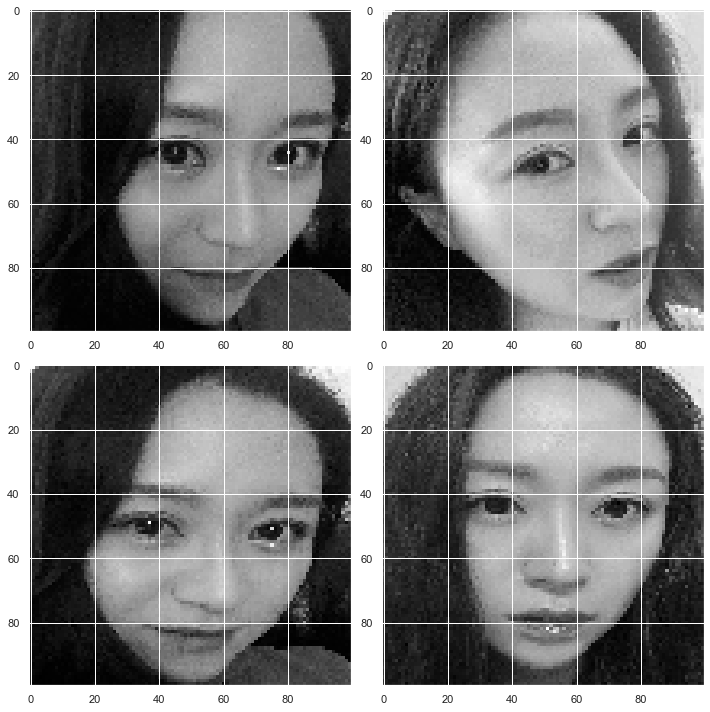

In [343]:
plt.figure(figsize=(10,10))
for i in range(0,4):
    plt.subplot(2,2,i+1)
    plt.imshow(hua[i], cmap=plt.cm.gray)
plt.tight_layout()
plt.show()

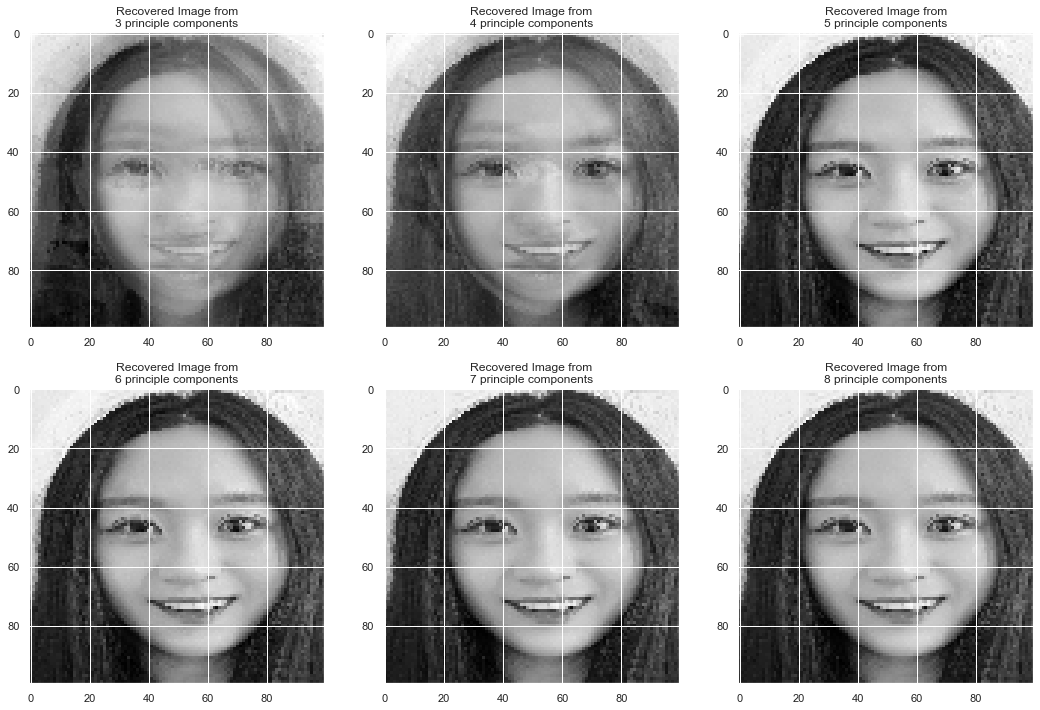

In [161]:
# image changes with different n component!
plt.figure(figsize=(18,12))
for i in [3,4,5,6,7,8]:
    plt.subplot(2,3,i-2)
    pca = PCA(n_components=i)
    pca.fit(hua_reshape)
    compressed = pca.transform(hua_reshape)
    plt.title('Recovered Image from\n{} principle components'.format(i))
    plt.imshow(pca.inverse_transform(compressed[6]).reshape(100,100), cmap=plt.cm.gray)